In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
%matplotlib inline

In [99]:
class neuralNetwork:
    def __init__(self, inputSize, hiddenSize, outputSize, learningRate, weightsIH=False, weightsHO=False):
        self.inpSize = inputSize
        self.outSize = outputSize
        self.hidSize = hiddenSize
        self.lr = learningRate

        if not weightsIH:
            self.weightsIH = np.random.normal(0.0, pow(self.inpSize, -0.5), (self.hidSize, self.inpSize))
        else:
            self.weightsIH = weightsIH

        if not weightsHO:
            self.weightsHO = np.random.normal(0.0, pow(self.hidSize, -0.5), (self.outSize, self.hidSize))
        else:
            self.weightsHO = weightsHO

    def train(self, x, y):
        x = np.array(x, ndmin=2).T
        y = np.array(y, ndmin=2).T
        
        hiddenOut = self.activation(self.weightsIH @ x)

        Output = self.activation(self.weightsHO @ hiddenOut)

        errors = y - Output

        self.weightsHO = self.weightsHO + self.lr * ((errors * Output * (1 - Output)) @ hiddenOut.T)

        hErrors = self.weightsHO.T @ errors

        self.weightsIH = self.weightsIH + self.lr * ((hErrors * hiddenOut * (1 - hiddenOut)) @ x.T)



    def predict(self, x):
        x = np.array(x, ndmin=2).T
        return self.activation(self.weightsHO @ self.activation(self.weightsIH @ x))  

    def activation(self, z):
        return 1/(1+2.718282**-z)
    
    def invActivation(self, z):
        return np.log(z/(1-z))
    
    def backquery(self, y):
        y = np.array(y, ndmin=2).T

        outSums = self.invActivation(y)
        hidOut = self.weightsHO.T @ outSums
        hidOut -= np.min(hidOut)
        hidOut /= np.max(hidOut)
        hidOut *= 0.98
        hidOut += 0.01

        hiddenSums = self.invActivation(hidOut)
        inp = self.weightsIH.T @ hiddenSums
        inp -= np.min(inp)
        inp /= np.max(inp)
        inp *= 0.98
        inp += 0.01

        return inp

In [84]:
train = pd.read_csv("mnist_train.csv", header=None)
test = pd.read_csv("mnist_test.csv", header=None)

In [85]:
##train
yTrainInit = np.array(train[[0]])

xTrain = np.array(train.drop(0, axis=1))/255*0.99+0.01

yTrain = np.full((len(yTrainInit), 10), 0.01)
for i in range(len(yTrainInit)):
    yTrain[i][yTrainInit[i]]=0.99

In [86]:
##test
yTestInit = np.array(test[[0]])
xTest = np.array(test.drop(0, axis=1))/255*0.99+0.01

yTest = np.full((len(yTestInit), 10), 0.01)
for i in range(len(yTestInit)):
    yTest[i][yTestInit[i]]=0.99

In [ ]:
for lr in [0.075, 0.050, 0.025]:
    
    mnist = neuralNetwork(len(xTrain[0]), 100, 10, lr)
    score = []

    for i in range(len(yTrainInit)):
        mnist.train(xTrain[i], yTrain[i])

    for j in range(len(yTestInit)):
        prediction = np.argmax(mnist.predict(xTest[j]))
        score.append(prediction==yTestInit[j])
    
    scores.insert(0, np.sum(score)/len(score))
    lrates.insert(0, lr)
    
scores = [0.9294, 0.936, 0.9396, 0.9477, 0.9421, 0.9348, 0.9345, 0.9136, 0.9025, 0.8426]
lrates = [0.025, 0.05, 0.075, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75]


In [ ]:
plt.plot(lrates, scores, linewidth=2)
plt.grid()

In [100]:
mnist = neuralNetwork(len(xTrain[0]), 200, 10, 0.11)

epScores = [0.9436, 0.9559, 0.9533]

for epoch in range(1):
    score = []
    for i in range(len(yTrainInit)):
        mnist.train(xTrain[i], yTrain[i])

In [69]:
text = open("mnistBrains.txt", 'w')

In [70]:
text.write(str(list(mnist.weightsIH)))
text.write('end')
text.write(str(list(mnist.weightsHO)))

text.close()

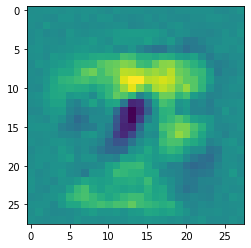

In [118]:
plt.imshow(mnist.backquery([0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.999,0.001,0.001]).reshape(28,28), )

/tmp/ipykernel_13265/3970934699.py:1: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  example = ndimage.interpolation.rotate(xTrain[0].reshape(28,28), 180, reshape=False)


5

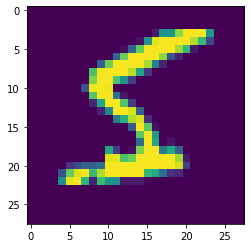

In [148]:
example = ndimage.interpolation.rotate(xTrain[0].reshape(28,28), 180, reshape=False)
plt.imshow(example)
np.argmax(mnist.predict(example.flatten()))